# Data Exploration and Analysis

In [1]:
import re
import string

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns

nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/haritsahm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Dataset Information

Read original dataset and understand the relevant informations

In [2]:
df = pd.read_csv("../data/SPOTIFY_REVIEWS.csv")

In [3]:
df.head()

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,14a011a8-7544-47b4-8480-c502af0ac26f,152618553977019693742,A Google user,Use it every day,5,1,1.1.0.91,2014-05-27 14:21:48
1,1,bfa8876b-470e-4640-83a7-77427f7f37e8,234382942865437071667,A Google user,"I enjoy the awesome UI of this app, and it has...",5,4,1.1.0.91,2014-05-27 14:36:02
2,2,70e8252f-058a-47d9-b066-df9e1571c970,174473604608358796368,A Google user,Love it! Especially the new design!,5,2,1.1.0.91,2014-05-27 14:40:01
3,3,672a155a-e81e-4d28-bdeb-a74c031bc072,286593453219054880269,A Google user,"Awesome UI, best music app out there!",5,1,1.1.0.91,2014-05-27 15:17:20
4,4,bbc1bf95-ed36-41a1-8b98-0f2e314caea5,167276875678680630145,A Google user,As a professional Android developer I'm glad t...,5,10,1.1.0.91,2014-05-27 15:26:48


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3377423 entries, 0 to 3377422
Data columns (total 9 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   review_id           object
 2   pseudo_author_id    object
 3   author_name         object
 4   review_text         object
 5   review_rating       int64 
 6   review_likes        int64 
 7   author_app_version  object
 8   review_timestamp    object
dtypes: int64(3), object(6)
memory usage: 231.9+ MB


# Preprocessing

## Cleanup

Clean the dataset by removing duplicates, null/nan values, and remove not relevant columns

In [5]:
print(df.isnull().sum())  # Null values

Unnamed: 0                 0
review_id                  0
pseudo_author_id           0
author_name                0
review_text             1022
review_rating              0
review_likes               0
author_app_version    666423
review_timestamp           0
dtype: int64


In [6]:
df.isna().sum()  # Empty Values

Unnamed: 0                 0
review_id                  0
pseudo_author_id           0
author_name                0
review_text             1022
review_rating              0
review_likes               0
author_app_version    666423
review_timestamp           0
dtype: int64

In [7]:
## Drop duplicates/null/na

df = df.drop_duplicates()  # Removes duplicate rows from the DataFrame
df = df.dropna()  # dropping empty values directly since there are only a thousand such records.
df.isna().sum()  # after removal of empty values

Unnamed: 0            0
review_id             0
pseudo_author_id      0
author_name           0
review_text           0
review_rating         0
review_likes          0
author_app_version    0
review_timestamp      0
dtype: int64

In [8]:
# Removing columns that are not required
df = df.drop(["Unnamed: 0", "pseudo_author_id"], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2710400 entries, 0 to 3377422
Data columns (total 7 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   review_id           object
 1   author_name         object
 2   review_text         object
 3   review_rating       int64 
 4   review_likes        int64 
 5   author_app_version  object
 6   review_timestamp    object
dtypes: int64(2), object(5)
memory usage: 165.4+ MB


## Transformations

Apply some complex data into more meaningful information.
- Timestamps -> Year/Monthly
- Ratings -> Sentiment [Positive/Neutral/Negative] (naive method)
- Text cleaning (naive methods)

Note:
- It'll take more time to perform sentiment analysis especially if we want to perform online dataloading
- Cleaning the text with basic methods, i.e. lowercase, remove newline, and whitespaces. This will create a compact sentences.

### Generate Sentiment 

In [10]:
df["sentiment"] = "Negative"  # adding a new column sentiment and setting all values to negative

# making changes according to defined classes for sentiments
df.loc[(df["review_rating"] >= 4) & (df["review_rating"] <= 5), "sentiment"] = "Positive"
df.loc[df["review_rating"] == 3, "sentiment"] = "Neutral"

### Text Cleaning

In [11]:
from tqdm.notebook import tqdm

tqdm.pandas()


# text cleaning function
def text_cleaning(text):
    text = text.lower()  # converting the text to lowercase
    text = re.sub("\n", " ", text)  # remove newline characters
    text = re.sub(r"\s+", " ", text)  # remove whitespaces
    return text


# applying the function to review_text column
df["review_text"] = df["review_text"].progress_apply(lambda x: text_cleaning(x))

  0%|          | 0/2710400 [00:00<?, ?it/s]

In [12]:
df = df.dropna()  # dropping empty values directly since there are only a thousand such records.
df.isna().sum()  # after removal of empty values

review_id             0
author_name           0
review_text           0
review_rating         0
review_likes          0
author_app_version    0
review_timestamp      0
sentiment             0
dtype: int64

In [13]:
df.head()

,review_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp,sentiment
0,14a011a8-7544-47b4-8480-c502af0ac26f,A Google user,use it every day,5,1,1.1.0.91,2014-05-27 14:21:48,Positive
1,bfa8876b-470e-4640-83a7-77427f7f37e8,A Google user,"i enjoy the awesome ui of this app, and it has...",5,4,1.1.0.91,2014-05-27 14:36:02,Positive
2,70e8252f-058a-47d9-b066-df9e1571c970,A Google user,love it! especially the new design!,5,2,1.1.0.91,2014-05-27 14:40:01,Positive
3,672a155a-e81e-4d28-bdeb-a74c031bc072,A Google user,"awesome ui, best music app out there!",5,1,1.1.0.91,2014-05-27 15:17:20,Positive
4,bbc1bf95-ed36-41a1-8b98-0f2e314caea5,A Google user,as a professional android developer i'm glad t...,5,10,1.1.0.91,2014-05-27 15:26:48,Positive


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2710400 entries, 0 to 3377422
Data columns (total 8 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   review_id           object
 1   author_name         object
 2   review_text         object
 3   review_rating       int64 
 4   review_likes        int64 
 5   author_app_version  object
 6   review_timestamp    object
 7   sentiment           object
dtypes: int64(2), object(6)
memory usage: 186.1+ MB


### Generate Additional Informations

In [15]:
# extract year and month from datetime and transform to string
df["review_month"] = pd.to_datetime(df["review_timestamp"]).dt.to_period("M").astype(str)
df["author_app_version"] = df["author_app_version"].fillna("None")
# Split sentences into words and count the number of words in each row
df["word_count"] = df["review_text"].str.split().apply(len)

df = df.drop(["review_timestamp"], axis=1)

## Save Dataset

In [16]:
df.to_csv("../data/spotify_reviews_cleaned.csv")

# Statistics - Cleaned

In [17]:
# df = pd.to_csv("../data/spotify_reviews_cleaned.csv")

## Rating Distributions

review_rating
5    1780446
1     379820
4     291536
3     146488
2     112110
Name: count, dtype: int64


/tmp/ipykernel_227925/2013819730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="review_rating", data=df, palette="viridis")


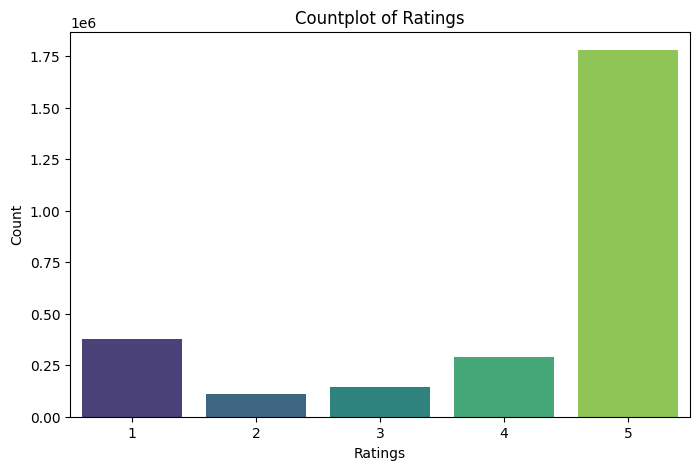

In [18]:
# Plotting counts of ratings for visualization

print(df["review_rating"].value_counts())  # distribution of ratings

plt.figure(figsize=(8, 5))
sns.countplot(x="review_rating", data=df, palette="viridis")
plt.title("Countplot of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

## Sentiment Distributions

sentiment
Positive    2071982
Negative     491930
Neutral      146488
Name: count, dtype: int64


/tmp/ipykernel_227925/1092819409.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=df, palette="viridis")


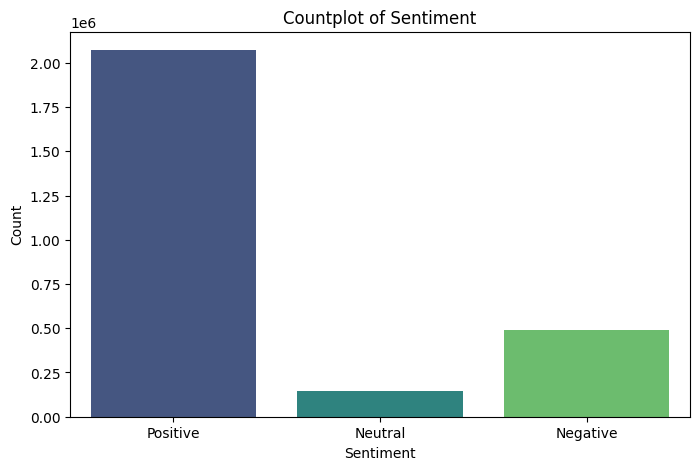

In [19]:
# Plotting counts of sentiment classes for visualization

print(df["sentiment"].value_counts())  # distribution of ratings

plt.figure(figsize=(8, 5))
sns.countplot(x="sentiment", data=df, palette="viridis")
plt.title("Countplot of Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

## Text Counts

In [20]:
# Split sentences into words and count the number of words in each row
df["word_count"] = df["review_text"].str.split().apply(len)

In [21]:
df["word_count"].agg(["min", "max", "mean"])

min       1.000000
max     699.000000
mean     13.641388
Name: word_count, dtype: float64

# Filtering Dataset

We were able to reduce the data by 19.7495% after applying data preprocessing. Even with 2.7M data left, we might not have enough memory to load the entire data.

Since we're going to analyze the user experiences with our app, we need to make sure that each review must have reasons to ensure that the review has full context. We don't want the reviews only contain irrelevant data such as:
- "Awe..Sum!!!"
- "Fun!!"
- "Great"
- "Bleddy ansum app!"
- "It is great"

We're going to use a **naive approach** to filter such that the reviews contain **more than 3 words** such that it contains:
- "Beats Pandora any day any time"
- "Fantastic app. Great music."
- "I love the variety of music they have"
- "Have to download playlist again bullshit!"

In [22]:
# Filter out rows where the word count is less than 3
df = df[df["word_count"] > 3]

# Drop the 'word_count' column if you don't need it anymore
df = df.drop("word_count", axis=1)

In [23]:
df.to_csv("../data/spotify_reviews_cleaned_filtered.csv")

# Handling Imbalanced Dataset

Noticed that from the previous statistics, we clearly can see that there is an imbalance with the number of data based on the number ratings provided by the users. Even though we can try to load the entire dataset, let's try to reduce the number of relevant data especially the highest rating.

**Assume that the positive ratings already contains a lot of similar informations**, lets reduce the data in rating 5 such that it has the same amount of data with the lowest ratings. This way, we can **reduce the number of data by 38.0584%**

With the naive approach of randomly sampling the rating '5' sets, we still have enough and relevant information from the original set.

In [24]:
# Naive way to get max total value from the second top values
max_total = df["review_rating"].value_counts().sort_values(ascending=False).loc[1]

# Calculate the total count for each value in 'review_rating'
value_counts = df["review_rating"].value_counts()

balanced_df = pd.DataFrame()

# Iterate over unique values in 'your_column'
for value in df["review_rating"].unique():
    # Filter rows with the current value
    subset = df[df["review_rating"] == value]

    # Sample the subset to achieve the maximum total count
    sampled_subset = subset.sample(min(max_total, value_counts[value]))

    # Append the sampled subset to the balanced DataFrame
    balanced_df = pd.concat([balanced_df, sampled_subset], ignore_index=True)

review_rating
5    326615
1    326615
4    218086
3    129143
2    105165
Name: count, dtype: int64


/tmp/ipykernel_227925/3640129916.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="review_rating", data=balanced_df, palette="viridis")


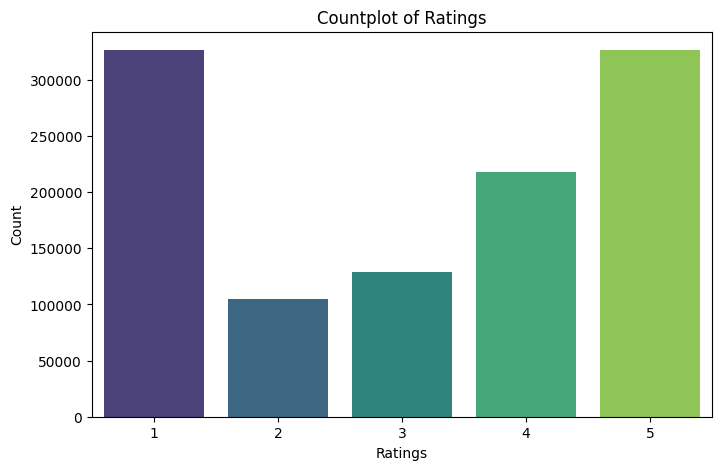

In [25]:
# Plotting counts of ratings for visualization

print(balanced_df["review_rating"].value_counts())  # distribution of ratings

plt.figure(figsize=(8, 5))
sns.countplot(x="review_rating", data=balanced_df, palette="viridis")
plt.title("Countplot of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

In [26]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105624 entries, 0 to 1105623
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   review_id           1105624 non-null  object
 1   author_name         1105624 non-null  object
 2   review_text         1105624 non-null  object
 3   review_rating       1105624 non-null  int64 
 4   review_likes        1105624 non-null  int64 
 5   author_app_version  1105624 non-null  object
 6   sentiment           1105624 non-null  object
 7   review_month        1105624 non-null  object
dtypes: int64(2), object(6)
memory usage: 67.5+ MB


In [27]:
balanced_df.isnull().sum()

review_id             0
author_name           0
review_text           0
review_rating         0
review_likes          0
author_app_version    0
sentiment             0
review_month          0
dtype: int64

In [28]:
balanced_df.head()

,review_id,author_name,review_text,review_rating,review_likes,author_app_version,sentiment,review_month
0,c4da42fc-3ef1-49ae-8327-2991960a42f8,CM***hy,quick and easy access to music. not the depth ...,5,0,8.5.89.901,Positive,2021-01
1,e54a7f89-35b0-4ed3-98f6-56192fd0039b,Ra********mi,awesome feature everything is good,5,0,8.7.40.777,Positive,2022-06
2,f0fd1545-3864-44cd-9a6a-c7a9ab04687d,A Google user,i love this app for music on my phone and my c...,5,0,1.8.0.993,Positive,2014-12
3,954e417e-cc8e-4df3-ae8d-fac70bb5d07e,A Google user,i like the selections and the playback over in...,5,0,8.5.18.934,Positive,2019-08
4,49e2b760-99f7-42bd-909c-d9adddcfb3d3,A Google user,"your music anytime and anywhere, love it",5,1,8.4.89.515,Positive,2019-01


In [29]:
balanced_df.to_csv("../data/spotify_reviews_cleaned_filtered_balanced.csv")

# DONE!